# **Datathon 4**

## **Data cleaning and Preprocessing**

In [ ]:
# Import libraries
from google.colab import files
import os
import io
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score, auc
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.impute import SimpleImputer
import warnings
from sklearn.datasets import load_iris
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline

!pip install category_encoders
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
#Import data
imported=files.upload()
df= pd.read_csv('datathon4 - subset.csv')

In [ ]:
df.head(10)

,hospital_death,elective_surgery,hospital_admit_source,icu_admit_source,icu_type,pre_icu_los_days,readmission_status
0,0,0,Floor,Floor,CTICU,0.541667,0
1,0,0,Floor,Floor,Med-Surg ICU,0.927778,0
2,0,0,Emergency Department,Accident & Emergency,Med-Surg ICU,0.000694,0
3,0,1,Operating Room,Operating Room / Recovery,CTICU,0.000694,0
4,0,0,NaN,Accident & Emergency,Med-Surg ICU,0.073611,0
5,0,0,Direct Admit,Accident & Emergency,Med-Surg ICU,0.000694,0
6,0,0,Operating Room,Accident & Emergency,Med-Surg ICU,0.000694,0
7,0,0,Emergency Department,Accident & Emergency,Med-Surg ICU,0.002083,0
8,1,0,Other Hospital,Other Hospital,CCU-CTICU,0.009028,0
9,0,0,Direct Admit,Accident & Emergency,CCU-CTICU,0.060417,0


In [ ]:
#Missing values
print(df.isnull().sum())

# Calculate the percentage missing values
percentage_missing_columns = (df.isnull().sum() / len(df)) * 100

print(percentage_missing_columns)

#Descriptive statstics
print(df.describe())

hospital_death               0
elective_surgery             0
hospital_admit_source    21409
icu_admit_source           112
icu_type                     0
pre_icu_los_days             0
readmission_status           0
dtype: int64
hospital_death            0.000000
elective_surgery          0.000000
hospital_admit_source    23.343474
icu_admit_source          0.122120
icu_type                  0.000000
pre_icu_los_days          0.000000
readmission_status        0.000000
dtype: float64
       hospital_death  elective_surgery  pre_icu_los_days  readmission_status
count    91713.000000      91713.000000      91713.000000             91713.0
mean         0.086302          0.183736          0.835766                 0.0
std          0.280811          0.387271          2.487756                 0.0
min          0.000000          0.000000        -24.947222                 0.0
25%          0.000000          0.000000          0.035417                 0.0
50%          0.000000          0.000000   

In [ ]:
#Counts
counts = ['hospital_death','elective_surgery','hospital_admit_source','icu_admit_source','icu_type','readmission_status']
for column in counts:
  print(df[column].value_counts())

0    83798
1     7915
Name: hospital_death, dtype: int64
0    74862
1    16851
Name: elective_surgery, dtype: int64
Emergency Department    36962
Operating Room           9787
Floor                    8055
Direct Admit             6441
Recovery Room            2896
Acute Care/Floor         1910
Other Hospital           1641
Step-Down Unit (SDU)     1131
PACU                     1017
Other ICU                 233
Chest Pain Center         134
ICU to SDU                 45
ICU                        35
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64
Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64
Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name

In [ ]:
#Dropping variable
df.drop(['readmission_status'], axis=1, inplace=True)

In [ ]:
# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df, x='hospital_death', y='pre_icu_los_days', title='Box Plot of Length of stay between hostial and unit admission Grouped by Death', color='hospital_death', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(
    template="plotly_white",
    height=2000  # Set the desired height in pixels
)

# Show the plot
fig_box.show()

<Axes: >

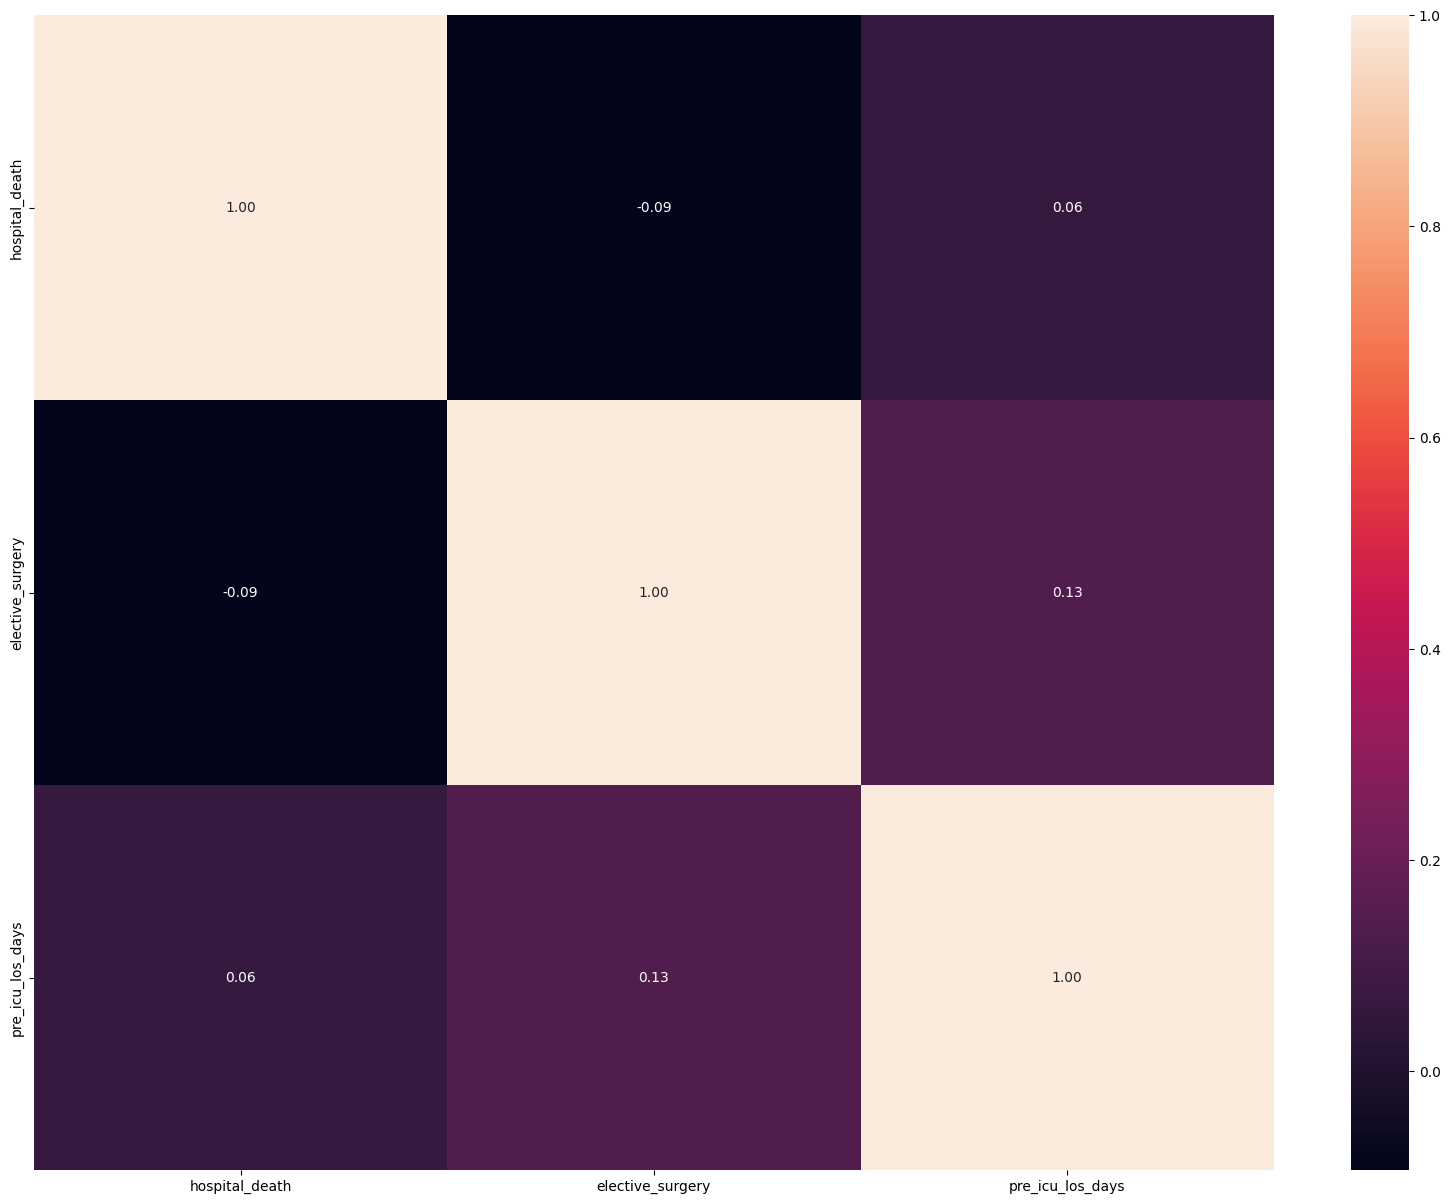

In [ ]:
# Correlation heatmap
corr_matrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

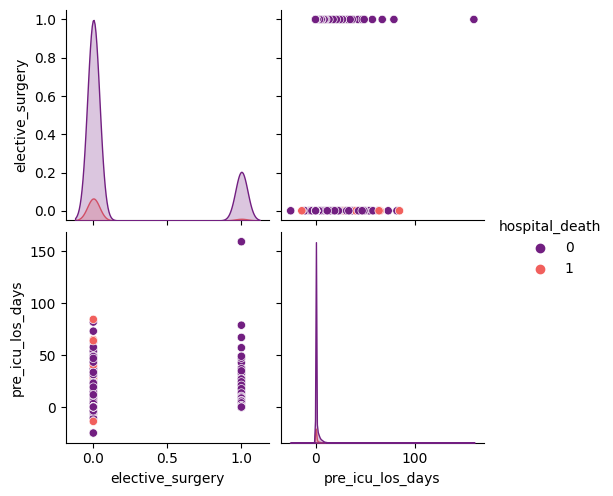

In [ ]:
#Pair plot
sns.pairplot(df, hue='hospital_death', palette="magma")
plt.show()

In [ ]:
#Check for imbalance
import plotly.express as px

counts = df['hospital_death'].value_counts()

colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,
    title='Distribution of Classes in "hospital_death"',
    color_discrete_sequence=colors
)

fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Diabetes'
    ),
    title=dict(
        text='Distribution of Classes in "hospital_death"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

In [ ]:
#### Missing value replaced with a new category 'Not Provided'

# Fill NaN values in the 'hospital_admit_source' and 'icu_admit_source' column with the new category 'Not Provided'
df['hospital_admit_source'].fillna('Not Provided', inplace=True)
df['icu_admit_source'].fillna('Not Provided', inplace=True)

In [ ]:
### Converting categorical variable to one hot encoding

categorical_columns = ['hospital_admit_source', 'icu_admit_source','icu_type']
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Use sparse=False to get a dense array

# Fit and transform the encoder on the categorical feature
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Get the feature names for the one-hot encoded variables
feature_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the one-hot encoded variables and feature names
one_hot_df = pd.DataFrame(one_hot_encoded, columns=feature_names)


# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Display the result
df_encoded.head
df_encoded.dtypes

hospital_death                                  int64
elective_surgery                                int64
pre_icu_los_days                              float64
hospital_admit_source_Acute Care/Floor        float64
hospital_admit_source_Chest Pain Center       float64
hospital_admit_source_Direct Admit            float64
hospital_admit_source_Emergency Department    float64
hospital_admit_source_Floor                   float64
hospital_admit_source_ICU                     float64
hospital_admit_source_ICU to SDU              float64
hospital_admit_source_Not Provided            float64
hospital_admit_source_Observation             float64
hospital_admit_source_Operating Room          float64
hospital_admit_source_Other                   float64
hospital_admit_source_Other Hospital          float64
hospital_admit_source_Other ICU               float64
hospital_admit_source_PACU                    float64
hospital_admit_source_Recovery Room           float64
hospital_admit_source_Step-D

In [ ]:
train_data = df_encoded.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_data = df_encoded.drop(train_data.index)


# check class imbalance

print(f'The number of observations in the training set with patient died during this hospitalization is {sum(train_data["hospital_death"] == 1)}')
print(f'The number of observations in the training set without patient died during this hospitalization is {sum(train_data["hospital_death"] == 0)}')

The number of observations in the training set with patient died during this hospitalization is 5532
The number of observations in the training set without patient died during this hospitalization is 58667


In [ ]:
#### Downsampling in the training data

X_train = train_data.drop('hospital_death', axis=1)
y_train = train_data['hospital_death']

X_test = test_data.drop('hospital_death', axis=1)
y_test = test_data['hospital_death']


from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(sum(y_resampled == 1))
print(sum(y_resampled == 0))

5532
5532


In [ ]:
## Logistic regression using balanced training dataset

from IPython.testing import test

# l1 penalty can shrink the coefficients of unfavorable features to 0.
log_reg = LogisticRegression(penalty='l1', C=1, solver='liblinear')
log_reg.fit(X_resampled, y_resampled)
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[16333  8798]
 [ 1190  1193]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.77     25131
           1       0.12      0.50      0.19      2383

    accuracy                           0.64     27514
   macro avg       0.53      0.58      0.48     27514
weighted avg       0.86      0.64      0.72     27514



In [ ]:
# Logisitic regression on original training dataset
log_reg = LogisticRegression(penalty='l1', C=1, class_weight='balanced', solver='liblinear')
log_reg.fit(X_train, y_train)
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[15658  9473]
 [ 1124  1259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.75     25131
           1       0.12      0.53      0.19      2383

    accuracy                           0.61     27514
   macro avg       0.53      0.58      0.47     27514
weighted avg       0.86      0.61      0.70     27514



In [ ]:
####. XGBoost model on balanced training data

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)


# Defining the hyperparameters to be tuned using GridSearchCV
param_dist = {
    "n_estimators" : [100, 200],
    "max_depth" : [1, 3, 5],
    "min_samples_leaf" : [25, 50],
    "learning_rate" : [.1,  .2]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search.fit(X_resampled, y_resampled)

# Storing and displaying the results of the grid search
results = pd.DataFrame(random_search.cv_results_)
print(results[results['rank_test_score'] == 1])

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       1.223338      0.202584         0.008618        0.001121   

  param_learning_rate param_max_depth param_min_samples_leaf  \
4                 0.1               3                     25   

  param_n_estimators                                             params  \
4                100  {'learning_rate': 0.1, 'max_depth': 3, 'min_sa...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
4           0.582467           0.596023           0.596927           0.576141   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
4           0.574141          0.58514        0.009659                1  


In [ ]:
# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(X_resampled, y_resampled)

# Predicting on the training dataset and computing the accuracy
Y_pred_train = model.predict(X_resampled)
# print(accuracy_score(X_resampled, Y_pred_train))

# Predicting on the test dataset and computing the accuracy
Y_pred_test = model.predict(test_data.drop('hospital_death', axis=1))
# print(accuracy_score(test_data['hospital_death'], Y_pred))


print(classification_report(Y_pred_train, y_resampled))
print(classification_report(Y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      5479
           1       0.62      0.61      0.61      5585

    accuracy                           0.61     11064
   macro avg       0.61      0.61      0.61     11064
weighted avg       0.61      0.61      0.61     11064

              precision    recall  f1-score   support

           0       0.57      0.94      0.71     15345
           1       0.59      0.12      0.19     12169

    accuracy                           0.57     27514
   macro avg       0.58      0.53      0.45     27514
weighted avg       0.58      0.57      0.48     27514

